In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

In [138]:
airbnb_data = pd.read_csv('AB_NYC_2019.csv')
airbnb_df = pd.DataFrame(airbnb_data)
airbnb_df.head()

airbnb_df['min_price_to_stay'] = airbnb_df['price'] * airbnb_df['minimum_nights']

airbnb_df = airbnb_df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group','neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'min_price_to_stay',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']]

manhattan_airbnb_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan']
manhattan_airbnb_df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,1200,0,NaN,NaN,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,500,0,NaN,NaN,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,1150,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,55,0,NaN,NaN,6,2


In [139]:
del manhattan_airbnb_df['name'],manhattan_airbnb_df['host_name']

In [140]:
manhattan_airbnb_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,NaN,NaN,1,365
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,2018-11-19,0.10,1,0
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,2019-06-22,0.59,1,129
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,2019-06-24,3.47,1,220


last_review and reviews_per_month are missing values compared to the rest of the data
likely due to listings have zero reviews...

In [141]:
manhattan_airbnb_df.count()

id                                21661
host_id                           21661
neighbourhood_group               21661
neighbourhood                     21661
latitude                          21661
longitude                         21661
room_type                         21661
price                             21661
minimum_nights                    21661
min_price_to_stay                 21661
number_of_reviews                 21661
last_review                       16632
reviews_per_month                 16632
calculated_host_listings_count    21661
availability_365                  21661
dtype: int64

In [142]:
manhattan_airbnb_df.loc[:, 'reviews_per_month'] = manhattan_airbnb_df.loc[:, 'reviews_per_month'].fillna(0)
manhattan_airbnb_df.head()

C:\Users\ulast\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,NaN,0.00,1,365
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,2018-11-19,0.10,1,0
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,2019-06-22,0.59,1,129
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,2019-06-24,3.47,1,220


In [143]:
manhattan_airbnb_df['last_review'] = manhattan_airbnb_df['last_review'].replace(np.nan, '9999-12-31') # last_review is a string
manhattan_airbnb_df

C:\Users\ulast\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,9999-12-31,0.00,1,365
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,2018-11-19,0.10,1,0
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,2019-06-22,0.59,1,129
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,274311461,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,1200,0,9999-12-31,0.00,1,176
48888,36484087,274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,500,0,9999-12-31,0.00,1,31
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,1150,0,9999-12-31,0.00,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,55,0,9999-12-31,0.00,6,2


In [144]:
price_bins = [0,49.9,99.9,149.9,249.9,499.9,10001]
price_bin_names = ['0-49','50-99','100-149','150-249','250-499','>500']

manhattan_airbnb_df['price range'] = pd.cut(manhattan_airbnb_df['price'],price_bins,labels=price_bin_names)

# Getting rid of 3 elements; 1. Properties with overnight accomodation prices >1000
# 2. Properties with overnight stays > 30
# 3. Properties with 0 reviews
manhattan_airbnb_df_1000 = manhattan_airbnb_df.loc[manhattan_airbnb_df['price'] <= 1000]
manhattan_airbnb_df_1000 = manhattan_airbnb_df_1000.loc[manhattan_airbnb_df_1000['minimum_nights'] <= 30]
manhattan_airbnb_df_1000 = manhattan_airbnb_df_1000.loc[manhattan_airbnb_df_1000['number_of_reviews'] > 0]

neighbourhood_by_count = manhattan_airbnb_df_1000[['neighbourhood', 'room_type', 'price range','number_of_reviews','minimum_nights','min_price_to_stay']].groupby(['neighbourhood', 'room_type', 'price range']).agg(['count', 'mean', 'min', 'max'])
neighbourhood_by_count = neighbourhood_by_count.sort_values(by=('number_of_reviews', 'count'), ascending=False)

neighbourhood_by_count.head(25)

C:\Users\ulast\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


number_of_reviews             \
                                                           count       mean   
neighbourhood      room_type       price range                                
Harlem             Private room    50-99                     909  36.346535   
East Village       Entire home/apt 150-249                   438  29.038813   
Hell's Kitchen     Entire home/apt 150-249                   412  26.218447   
Upper West Side    Entire home/apt 150-249                   408  20.720588   
Upper East Side    Entire home/apt 150-249                   404  23.559406   
                                   100-149                   346  17.546243   
East Harlem        Private room    50-99                     341  46.111437   
Washington Heights Private room    50-99                     313  31.421725   
Harlem             Entire home/apt 100-149                   307  38.166124   
Upper West Side    Private room    50-99                     291  30.326460   
East Village       Private room    50-99                     278  34.892086   
Chelsea            Entire home/apt 150-249                   276  26.822464   
Midtown            Entire home/apt 150-249                   274  20.868613   
Harlem             Entire home/apt 150-249                   273  39.531136   
West Village       Entire home/apt 150-249                   271  25.084871   
Financial District Entire home/apt 150-249                   243  10.127572   
Hell's Kitchen     Entire home/apt 250-499                   242  25.260331   
East Village       Entire home/apt 100-149                   224  25.741071   
Hell's Kitchen     Private room    100-149                   216  52.893519   
Lower East Side    Entire home/apt 150-249                   207  34.512077   
Upper West Side    Entire home/apt 100-149                   206  19.325243   
East Village       Entire home/apt 250-499                   206  27.820388   
Upper West Side    Entire home/apt 250-499                   201  18.422886   
Upper East Side    Private room    50-99                     196  32.020408   
Hell's Kitchen     Private room    50-99                     193  48.347150   

                                                           minimum_nights  \
                                                min    max          count   
neighbourhood      room_type       price range                              
Harlem             Private room    50-99        1.0  458.0            909   
East Village       Entire home/apt 150-249      1.0  403.0            438   
Hell's Kitchen     Entire home/apt 150-249      1.0  276.0            412   
Upper West Side    Entire home/apt 150-249      1.0  401.0            408   
Upper East Side    Entire home/apt 150-249      1.0  314.0            404   
                                   100-149      1.0  226.0            346   
East Harlem        Private room    50-99        1.0  325.0            341   
Washington Heights Private room    50-99        1.0  307.0            313   
Harlem             Entire home/apt 100-149      1.0  322.0            307   
Upper West Side    Private room    50-99        1.0  353.0            291   
East Village       Private room    50-99        1.0  451.0            278   
Chelsea            Entire home/apt 150-249      1.0  252.0            276   
Midtown            Entire home/apt 150-249      1.0  202.0            274   
Harlem             Entire home/apt 150-249      1.0  287.0            273   
West Village       Entire home/apt 150-249      1.0  272.0            271   
Financial District Entire home/apt 150-249      1.0  152.0            243   
Hell's Kitchen     Entire home/apt 250-499      1.0  287.0            242   
East Village       Entire home/apt 100-149      1.0  388.0            224   
Hell's Kitchen     Private room    100-149      1.0  394.0            216   
Lower East Side    Entire home/apt 150-249      1.0  286.0            207   
Upper West Side    Entire home/apt 100-149      1.0  214.0     

In [159]:
manhattan_neighbourhood_by_popularity = []

for row in neighbourhood_by_count.head(25).index:
    if row[0] not in manhattan_neighbourhood_by_popularity:
        manhattan_neighbourhood_by_popularity.append(row[0])

manhattan_neighbourhood_listing_count = []


for n in manhattan_neighbourhood_by_popularity:
    count = len(manhattan_airbnb_df_1000.loc[manhattan_airbnb_df_1000['neighbourhood'] == n])
    manhattan_neighbourhood_listing_count.append(count)

listing_count_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': manhattan_neighbourhood_by_popularity,
    'count': manhattan_neighbourhood_listing_count
})

listing_count_by_neighbourhood_df = listing_count_by_neighbourhood_df.sort_values(by='count', ascending=False)
listing_count_by_neighbourhood_df

,neighbourhood,count
0,Harlem,2177
2,Hell's Kitchen,1512
1,East Village,1472
3,Upper West Side,1452
4,Upper East Side,1355
8,Midtown,968
5,East Harlem,937
7,Chelsea,802
11,Lower East Side,731
6,Washington Heights,708


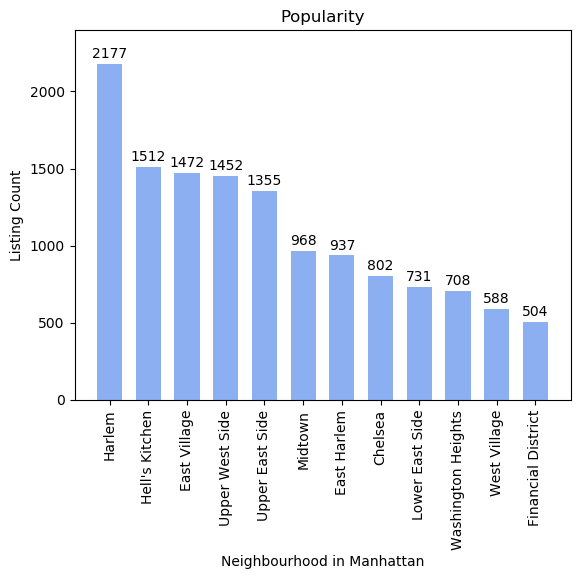

In [146]:
fig, ax = plt.subplots()

x_axis = np.arange(len(manhattan_neighbourhood_by_popularity))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, listing_count_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = listing_count_by_neighbourhood_df['count']


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Listing Count')
ax.set_title('Popularity')
ax.set_xlabel('Neighbourhood in Manhattan')
ax.set_ylim(0,max(manhattan_neighbourhood_listing_count)+220)


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()

In [147]:
neighbourhood_by_price = neighbourhood_by_count.head(25)

neighbourhood_by_price.loc[:, 'worth_per_stay'] = neighbourhood_by_price.loc[:, ('minimum_nights', 'mean')] * neighbourhood_by_price.loc[:, ('min_price_to_stay', 'mean')] 

neighbourhood_by_price.loc[:, 'Room Type'] = ''

for i in range(len(neighbourhood_by_price)):
    neighbourhood_by_price.iloc[i, 13] = neighbourhood_by_price.index[i][1]

    
for i in range(len(neighbourhood_by_price)):
    if neighbourhood_by_price.iloc[i, 13] == 'Private room':
        neighbourhood_by_price.iloc[i, 12] = neighbourhood_by_price.iloc[i, 5] * neighbourhood_by_price.iloc[i, 9]  * 2
        
neighbourhood_by_price = neighbourhood_by_price.sort_values(by='worth_per_stay', ascending=False)

del neighbourhood_by_price['Room Type']

neighbourhood_by_price.head()



C:\Users\ulast\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2858: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Users\ulast\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ulast\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


number_of_reviews                  \
                                                        count       mean  min   
neighbourhood   room_type       price range                                     
Upper West Side Entire home/apt 250-499                   201  18.422886  1.0   
Midtown         Entire home/apt 150-249                   274  20.868613  1.0   
Upper East Side Entire home/apt 100-149                   346  17.546243  1.0   
Upper West Side Entire home/apt 150-249                   408  20.720588  1.0   
                                100-149                   206  19.325243  1.0   

                                                   minimum_nights             \
                                               max          count       mean   
neighbourhood   room_type       price range                                    
Upper West Side Entire home/apt 250-499      155.0            201   8.189055   
Midtown         Entire home/apt 150-249      202.0            274   9.317518   
Upper East Side Entire home/apt 100-149      226.0            346  10.349711   
Upper West Side Entire home/apt 150-249      401.0            408   8.171569   
                                100-149      214.0            206  10.009709   

                                                       min_price_to_stay  \
                                             min   max             count   
neighbourhood   room_type       price range                                
Upper West Side Entire home/apt 250-499      1.0  30.0               201   
Midtown         Entire home/apt 150-249      1.0  30.0               274   
Upper East Side Entire home/apt 100-149      1.0  30.0               346   
Upper West Side Entire home/apt 150-249      1.0  30.0               408   
                                100-149      1.0  30.0               206   

                                                                          \
                                                    mean    min      max   
neighbourhood   room_type       price range                                
Upper West Side Entire home/apt 250-499      2530.004975  250.0  14970.0   
Midtown         Entire home/apt 150-249      1757.974453  150.0   7470.0   
Upper East Side Entire home/apt 100-149      1282.343931  100.0   4470.0   
Upper West Side Entire home/apt 150-249      1532.004902  150.0   7350.0   
                                100-149      1236.383495  100.0   4260.0   

                                            worth_per_stay  
                                                            
neighbourhood   room_type       price range                 
Upper West Side Entire home/apt 250-499       20718.349199  
Midtown         Entire home/apt 150-249       16379.959042  
Upper East Side Entire home/apt 100-149       13271.889062  
Upper West Side Entire home/apt 150-249       12518.883194  
                                100-149       12375.838675

In [148]:
manhattan_neighbourhood_by_worth = []

for row in neighbourhood_by_price.index:
    if row[0] not in manhattan_neighbourhood_by_worth:
        manhattan_neighbourhood_by_worth.append(row[0])
        

neighbourhood_by_price.loc[:, 'location'] = ''
for i in range(len(neighbourhood_by_price)):
    neighbourhood_by_price.iloc[i, 13] = neighbourhood_by_price.index[i][0]
    


manhattan_neighbourhood_worth_per_stay = []


for n in manhattan_neighbourhood_by_worth:
    price = sum(neighbourhood_by_price.loc[neighbourhood_by_price['location'] == n, 'worth_per_stay'])
    manhattan_neighbourhood_worth_per_stay.append(price)
    

worth_per_stay_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': manhattan_neighbourhood_by_worth,
    'Worth per Stay': manhattan_neighbourhood_worth_per_stay
})

worth_per_stay_by_neighbourhood_df = worth_per_stay_by_neighbourhood_df.sort_values(by='Worth per Stay', ascending=False)
worth_per_stay_by_neighbourhood_df



C:\Users\ulast\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2858: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


,neighbourhood,Worth per Stay
0,Upper West Side,49284.477594
2,Upper East Side,25987.757795
3,Hell's Kitchen,22482.701592
7,East Village,16458.016032
1,Midtown,16379.959042
4,Financial District,10659.076360
9,Harlem,8301.957745
5,Chelsea,6472.710512
6,West Village,6367.586838
8,Lower East Side,5010.938878


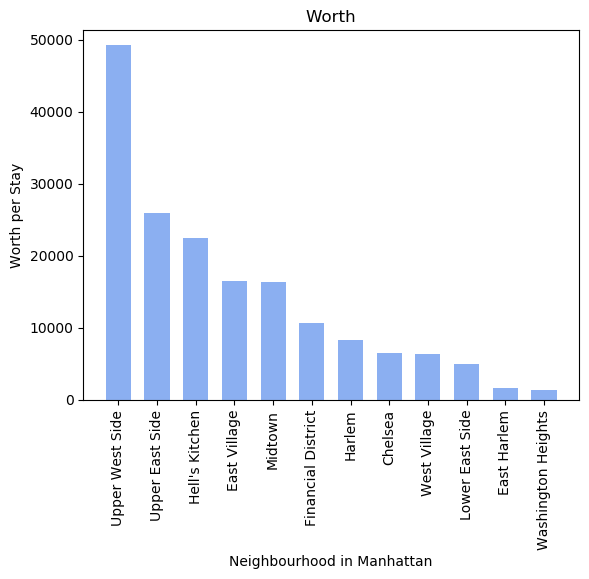

In [149]:
fig, ax = plt.subplots()

x_axis = np.arange(len(manhattan_neighbourhood_by_worth))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, worth_per_stay_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = round(worth_per_stay_by_neighbourhood_df['Worth per Stay'], 2)


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Worth per Stay')
ax.set_title('Worth')
ax.set_xlabel('Neighbourhood in Manhattan')
ax.set_ylim(0,max(manhattan_neighbourhood_worth_per_stay)+2000)


# def autolabel(rects):
#     # Attach a text label above each bar in *rects*, displaying its height.
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 2),  
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)

plt.show()

Picking top 5 neighbourhoods for profitability calculation:

1. Upper West Side
2. Upper East Side
3. Hell's Kitchen
4. East Village
5. Midtown

Harlem didn't make it in the list due to its low worth.


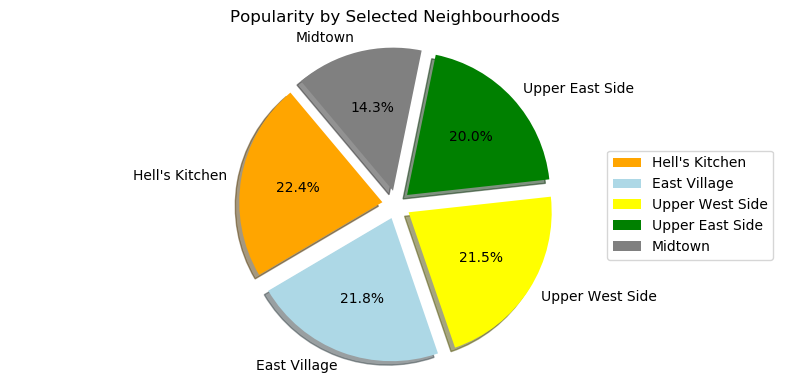

In [150]:
pie_chart_df = listing_count_by_neighbourhood_df.reset_index(drop=True)

pie_chart_df = pie_chart_df.loc[1:5, :]

fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

neigh_list = pie_chart_df['neighbourhood']
length = len(pie_chart_df['neighbourhood'])

x_axis = np.arange(length)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, neigh_list, rotation=90)

y_axis = pie_chart_df['count']

explode = (0.1,0.1,0.1,0.1,0.1)
colors = ["orange","lightblue", "yellow", "green", "grey"]

ax.pie(y_axis, explode=explode, labels=neigh_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

ax.set_title("Popularity by Selected Neighbourhoods")
ax.legend(loc="center right")

plt.axis("equal")

fig.tight_layout()
plt.show()


In [151]:
profitability_df = worth_per_stay_by_neighbourhood_df.reset_index(drop=True)

profitability_df = profitability_df.iloc[0:5, :]

profitability_df.loc[:, 'Profitability'] = ''

profitability_df.iloc[0, 2] = profitability_df.iloc[0, 1] * (pie_chart_df.iloc[0, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[1, 2] = profitability_df.iloc[1, 1] * (pie_chart_df.iloc[1, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[2, 2] = profitability_df.iloc[2, 1] * (pie_chart_df.iloc[2, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[3, 2] = profitability_df.iloc[3, 1] * (pie_chart_df.iloc[3, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[4, 2] = profitability_df.iloc[4, 1] * (pie_chart_df.iloc[4, 1] / sum(pie_chart_df['count'])) 

profitability_df = profitability_df.loc[:, ['neighbourhood', 'Profitability']]

profitability_df


,neighbourhood,Profitability
0,Upper West Side,11025
1,Upper East Side,5659.71
2,Hell's Kitchen,4829.84
3,East Village,3299.4
4,Midtown,2345.88


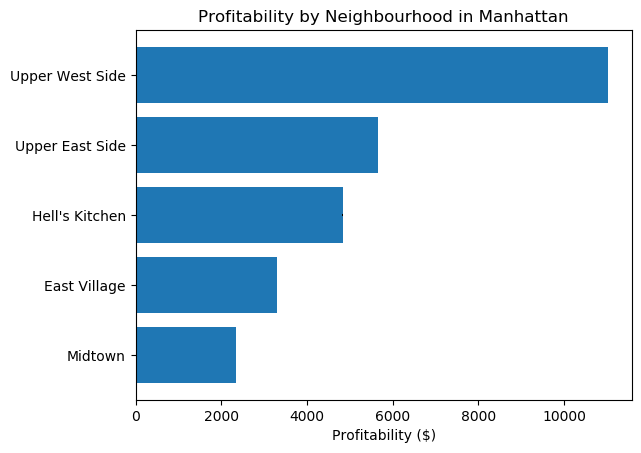

In [152]:
y_axis = profitability_df['neighbourhood'].values
x_axis = profitability_df['Profitability'].values


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(y_axis))
error = np.random.rand(len(y_axis))

ax.barh(y_pos, x_axis, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Profitability ($)')
ax.set_title('Profitability by Neighbourhood in Manhattan')

plt.show()

In [153]:
bronx_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Bronx']

manhattan_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan']

queens_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens']

brooklyn_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Brooklyn']

staten_island_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Staten Island']

In [154]:
bronx_sample_crime_df = bronx_crime_df.sample(n=100, replace=True, random_state=1)
manhattan_sample_crime_df = manhattan_crime_df.sample(n=100, replace=True, random_state=1)
queens_sample_crime_df = queens_crime_df.sample(n=100, replace=True, random_state=1)
brooklyn_sample_crime_df = brooklyn_crime_df.sample(n=100, replace=True, random_state=1)
staten_island_sample_crime_df = staten_island_crime_df.sample(n=100, replace=True, random_state=1)


bronx_sample_crime_df = bronx_sample_crime_df.reset_index(drop=True)
manhattan_sample_crime_df = manhattan_sample_crime_df.reset_index(drop=True)
queens_sample_crime_df = queens_sample_crime_df.reset_index(drop=True)
brooklyn_sample_crime_df = brooklyn_sample_crime_df.reset_index(drop=True)
staten_island_sample_crime_df = staten_island_sample_crime_df.reset_index(drop=True)

In [157]:
crime_df_sample_list = [bronx_sample_crime_df, manhattan_sample_crime_df, queens_sample_crime_df, brooklyn_sample_crime_df, staten_island_sample_crime_df]

neighbourhoods = ['Bronx', 'Manhattan', 'Queens', 'Brooklyn', 'Staten Island']
crime_numbers = []

for sample in crime_df_sample_list:
    for index, row in sample.iterrows():
        neighbourhood = row["neighbourhood"]
        neighbourhood_group = row["neighbourhood_group"]
        print(f'Looking for crime rate in index no:{index} | {neighbourhood} | {neighbourhood_group}')
        lat = row["latitude"]
        lng = row["longitude"]
        url = 'https://data.cityofnewyork.us/resource/qb7u-rbmr.json?$where=within_circle'
        query_url = url + f"(lat_lon, {lat}, {lng}, 2000)"
    
        response = requests.get(query_url)
        data = response.json()
    
        try:
            sample.loc[index,'Number of Crimes'] = len(data)

        except:
            print(f"missing value for row number {index}")
    print(f"Total Number of Crimes in {neighbourhood_group}: {sum(sample['Number of Crimes'])}")
    crime_numbers.append(sum(sample['Number of Crimes']))
    
print(f"------------------------------------------------------------------------")
print(f"Data retrieval complete.")

Looking for crime rate in index no:0 | Pelham Gardens | Bronx
Looking for crime rate in index no:1 | Longwood | Bronx
Looking for crime rate in index no:2 | Williamsbridge | Bronx
Looking for crime rate in index no:3 | Kingsbridge | Bronx
Looking for crime rate in index no:4 | Mott Haven | Bronx
Looking for crime rate in index no:5 | Throgs Neck | Bronx
Looking for crime rate in index no:6 | Norwood | Bronx
Looking for crime rate in index no:7 | Port Morris | Bronx
Looking for crime rate in index no:8 | Pelham Bay | Bronx
Looking for crime rate in index no:9 | Longwood | Bronx
Looking for crime rate in index no:10 | Allerton | Bronx
Looking for crime rate in index no:11 | Woodlawn | Bronx
Looking for crime rate in index no:12 | Morrisania | Bronx
Looking for crime rate in index no:13 | Soundview | Bronx
Looking for crime rate in index no:14 | North Riverdale | Bronx
Looking for crime rate in index no:15 | Mott Haven | Bronx
Looking for crime rate in index no:16 | Parkchester | Bronx
Lo

Looking for crime rate in index no:36 | East Harlem | Manhattan
Looking for crime rate in index no:37 | East Village | Manhattan
Looking for crime rate in index no:38 | Gramercy | Manhattan
Looking for crime rate in index no:39 | East Village | Manhattan
Looking for crime rate in index no:40 | Lower East Side | Manhattan
Looking for crime rate in index no:41 | Upper West Side | Manhattan
Looking for crime rate in index no:42 | Kips Bay | Manhattan
Looking for crime rate in index no:43 | Washington Heights | Manhattan
Looking for crime rate in index no:44 | East Harlem | Manhattan
Looking for crime rate in index no:45 | Washington Heights | Manhattan
Looking for crime rate in index no:46 | Upper West Side | Manhattan
Looking for crime rate in index no:47 | Little Italy | Manhattan
Looking for crime rate in index no:48 | West Village | Manhattan
Looking for crime rate in index no:49 | Chinatown | Manhattan
Looking for crime rate in index no:50 | Harlem | Manhattan
Looking for crime rate 

Looking for crime rate in index no:66 | Ridgewood | Queens
Looking for crime rate in index no:67 | Flushing | Queens
Looking for crime rate in index no:68 | Queens Village | Queens
Looking for crime rate in index no:69 | Kew Gardens | Queens
Looking for crime rate in index no:70 | Jackson Heights | Queens
Looking for crime rate in index no:71 | Woodside | Queens
Looking for crime rate in index no:72 | Jamaica | Queens
Looking for crime rate in index no:73 | Queens Village | Queens
Looking for crime rate in index no:74 | St. Albans | Queens
Looking for crime rate in index no:75 | East Elmhurst | Queens
Looking for crime rate in index no:76 | Woodside | Queens
Looking for crime rate in index no:77 | Rego Park | Queens
Looking for crime rate in index no:78 | Long Island City | Queens
Looking for crime rate in index no:79 | Long Island City | Queens
Looking for crime rate in index no:80 | Astoria | Queens
Looking for crime rate in index no:81 | Ridgewood | Queens
Looking for crime rate in 

Looking for crime rate in index no:96 | Williamsburg | Brooklyn
Looking for crime rate in index no:97 | Williamsburg | Brooklyn
Looking for crime rate in index no:98 | Gowanus | Brooklyn
Looking for crime rate in index no:99 | Bushwick | Brooklyn
Total Number of Crimes in Brooklyn: 2.0
Looking for crime rate in index no:0 | St. George | Staten Island
Looking for crime rate in index no:1 | Randall Manor | Staten Island
Looking for crime rate in index no:2 | Richmondtown | Staten Island
Looking for crime rate in index no:3 | Clifton | Staten Island
Looking for crime rate in index no:4 | Arrochar | Staten Island
Looking for crime rate in index no:5 | Stapleton | Staten Island
Looking for crime rate in index no:6 | South Beach | Staten Island
Looking for crime rate in index no:7 | Stapleton | Staten Island
Looking for crime rate in index no:8 | Stapleton | Staten Island
Looking for crime rate in index no:9 | St. George | Staten Island
Looking for crime rate in index no:10 | Willowbrook | S

In [158]:
crime_df = pd.DataFrame({'Neighbourhood': neighbourhoods,
                         'Total Crime Number': crime_numbers
                        })

crime_df = crime_df.sort_values(by='Total Crime Number', ascending=False)
crime_df

,Neighbourhood,Total Crime Number
1,Manhattan,342.0
0,Bronx,12.0
2,Queens,7.0
3,Brooklyn,2.0
4,Staten Island,0.0
